## Ising Problem Simple Neural Network

### Import

In [1]:
from __future__ import division
from __future__ import print_function

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from numpy.random import rand
import random


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from skimage.measure import block_reduce
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf

import time
import datetime

# filename_low_64 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-a-lowT"
# filename_high_64 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-a-highT"

# filename_low_32 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-d-lowT"
# filename_high_32 = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/PS2-d-highT"

# kraggle_SVM_data = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/hw2p1a_testset.csv"
# kraggle_SVM_label = "/content/drive/My Drive/02_Grad School/G1/Spring/Inverse Problems/HW/HW2/hw2p1a_sample_int.csv"

filename_low_64 = "PS2-a-lowT"
filename_high_64 = "PS2-a-highT"

filename_low_32 = "PS2-d-lowT"
filename_high_32 = "PS2-d-highT"

# kraggle_SVM_data = "hw2p1a_testset.csv"

# kraggle_CNN_data = "hw2p1b_testset.csv"

# from google.colab import drive
# drive.mount('/content/drive')
#https://colab.research.google.com/drive/1srw_HFWQ2SMgmWIawucXfusGzrj1_U0q

Using TensorFlow backend.
/home/zack/anaconda3/envs/am216/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zack/anaconda3/envs/am216/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zack/anaconda3/envs/am216/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zack/anaconda3/envs/am2

### Import  64x64 Data

In [2]:
#Import the relevent images into python
high_t_64 = []
for i in range(500):
    high_t_64.append(np.loadtxt((filename_high_64+'/PS2-a-highT/')+str(i).zfill(3), delimiter=','))


In [3]:
#Import the relevent images into python
low_t_64 = []
for i in range(500):
    low_t_64.append(np.loadtxt((filename_low_64+'/PS2-a-lowT/')+str(i).zfill(3), delimiter=','))

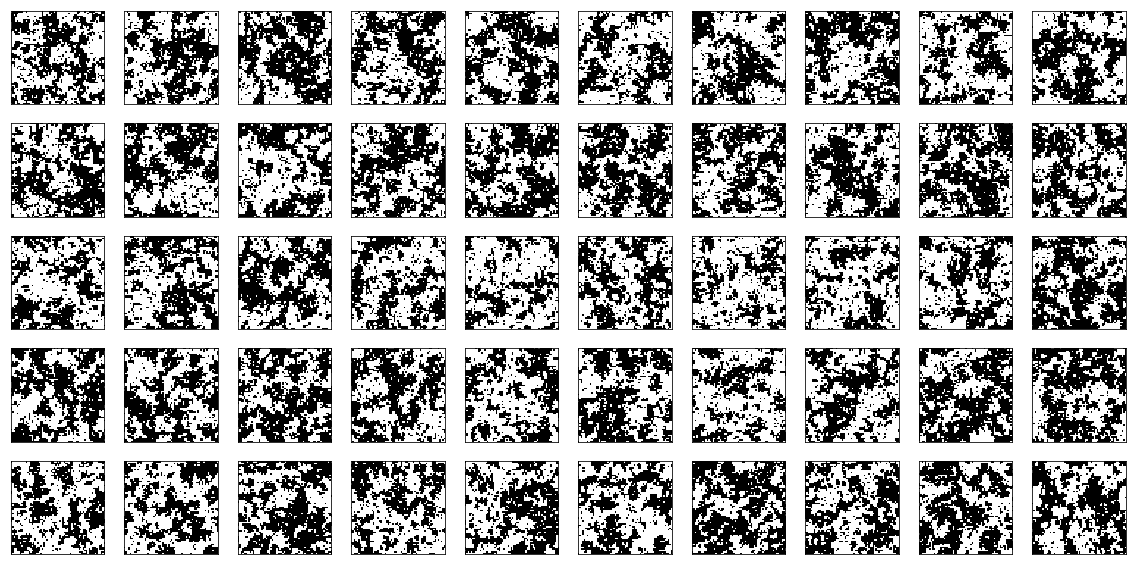

In [4]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(high_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

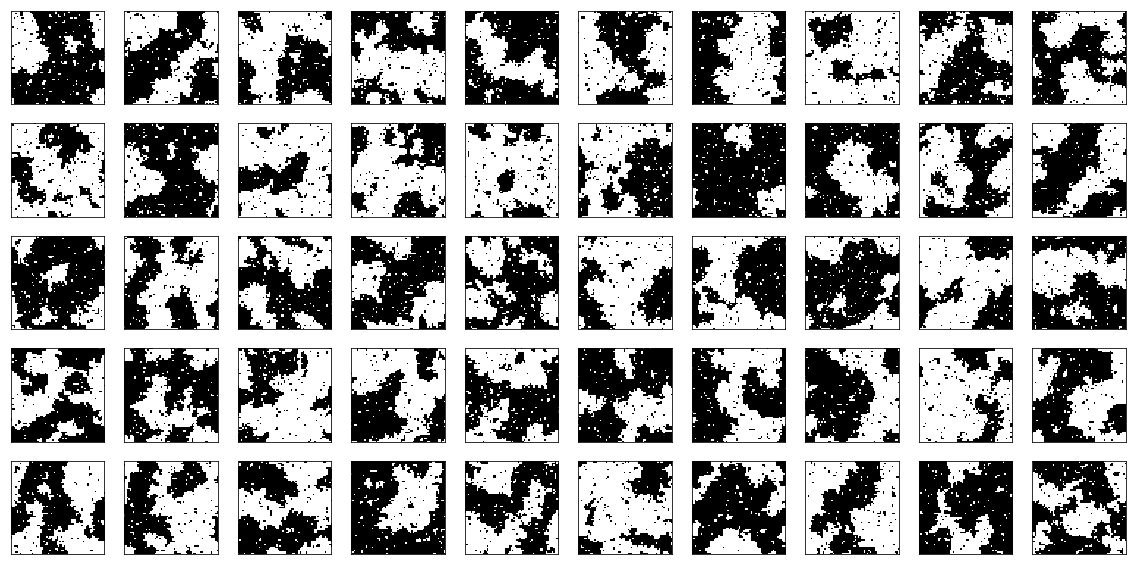

In [5]:
#Plot an array of some of the images, to try and better see what is going on.
fig,ax = plt.subplots(5,10,figsize=(20,10))
for i in range(50):
    ax[i//10,i%10].matshow(low_t_64[i],cmap=plt.cm.binary)
    ax[i//10,i%10].set_xticks(())
    ax[i//10,i%10].set_yticks(())

In [6]:
#Combine the two data-sets into a single array
data_img_64 = np.concatenate((high_t_64,low_t_64))

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
data_img_64 = data_img_64.reshape((-1, 64*64))

#Provide a set of labels which match the images (1 for high, and 0 for low)
data_label_64 = np.concatenate((np.ones(len(high_t_64)), np.zeros(len(low_t_64))))

#Randomize the data and labels in the same manner, so that I can easily create train and test sets
data_img_64, data_label_64 = shuffle(data_img_64, data_label_64, random_state = 0)

### Train and Test Model


To give you a preview of the power which neural networks (NN) hold, we create a very simple NN to categorize our ising images.


In [7]:
#https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
#https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
# Train a model using the test set
n_train = 750
batch_size = 128
num_classes = 2
epochs = 50

img_rows, img_cols = 64, 64

x_train = data_img_64[:n_train]
y_train = data_label_64[:n_train]

x_test = data_img_64[n_train:]
y_test = data_label_64[n_train:]

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Because our data is already between 0 and 1, we have no need to rescale it
#(As we would for a color or greyscale image)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (750, 64, 64, 1)
750 train samples
250 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Test loss: 1.4268037900924682
Test accuracy: 0.5


Ok obviously this performance is crap since it is literally worse than chance. However, before we start blindly trying to improve the neural network architecture, let's see if we can't transform the data to be more easily classified in the first place. The first thing that comes to mind is to look at some form of local variance for the image rather than the raw images themselves. Taking a look at this below...

In [9]:
def loc_var(img):
    loc_var_img = block_reduce(img, block_size=(4,4), func=np.var)
    return loc_var_img

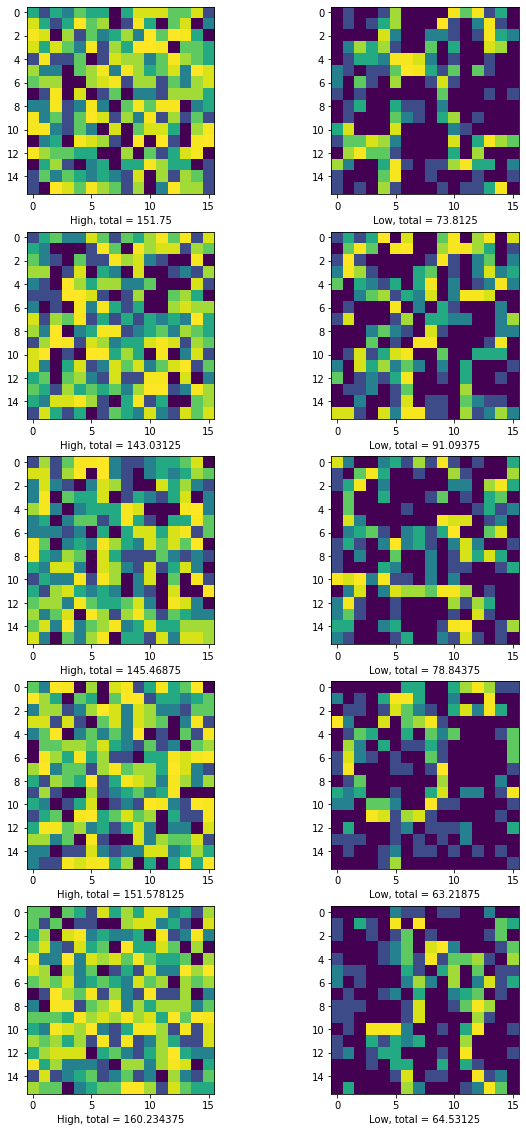

In [11]:
## MY SOLUTION ##
# Visulize the local variance of the data
n_sample = 5
high_rand_vec = random.sample(range(0,len(high_t_64)),n_sample)
low_rand_vec = random.sample(range(0,len(low_t_64)),n_sample)
high_64_img_var_sample = [loc_var(high_t_64[i]) for i in high_rand_vec]
low_64_img_var_sample = [loc_var(low_t_64[i]) for i in low_rand_vec]

fig,ax = plt.subplots(n_sample, 2,figsize=(10,4*n_sample))
for i in range(n_sample):
    ax[i,0].imshow(high_64_img_var_sample[i])
    ax[i,0].set_xlabel("High, total = " + str(np.sum(high_64_img_var_sample[i])))
    ax[i,1].imshow(low_64_img_var_sample[i])
    ax[i,1].set_xlabel("Low, total = " + str(np.sum(low_64_img_var_sample[i])))

Ok so this should be easy to classify. In fact, I bet we could get 100% accuracy using a simple logistic regression model on the total local variance. Let's do that real quick below.

In [29]:
ht64_tot_loc_var_list = []
lt64_tot_loc_var_list = []

# Calculate the total local variance for all images
for img in high_t_64:
    ht64_tot_loc_var_list.append(np.sum(loc_var(img)))
for img in low_t_64:
    lt64_tot_loc_var_list.append(np.sum(loc_var(img)))

# Create train/test splits
mix64_tot_loc_var_list = np.concatenate((ht64_tot_loc_var_list, lt64_tot_loc_var_list)).reshape(-1,1)
mix64_lbl = np.concatenate((np.ones(len(ht64_tot_loc_var_list)), np.zeros(len(lt64_tot_loc_var_list))))

log_64_train_img, log_64_test_img, log_64_train_lbl, log_64_test_lbl = train_test_split(
    mix64_tot_loc_var_list, mix64_lbl, test_size=1/5.0, random_state=0)

In [31]:
log_reg = LogisticRegression(solver = 'lbfgs',max_iter=1000)
logisticRegr.fit(log_64_train_img, log_64_train_lbl)

In [33]:
score = logisticRegr.score(log_64_test_img, log_64_test_lbl)
print("Accuracy Score: " + str(score))

Accuracy Score: 1.0


So by transforming the data before analyzing it, we were able to get 100% accuracy without using anything fancier than out of the box logistic regression. __The reason logisctic regression does not work well on the raw data is because it is not stereotyped enough, and the points occupy some $64^2$-dimensional space in not easily identitiable clusters. The structure to the two classes is hidden one layer of abstraction beyond what logistic regression is able to reach.__

### Kaggel

#### Import Test 64x64 Data

In [ ]:
#Import the relevent images into python
#t_data = np.genfromtxt(kaggle_CNN_data, delimiter = ',')
#t_data.shape

In [ ]:
#Plot an array of some of the images, to try and better see what is going on.
#fig,ax = plt.subplots(5,10,figsize=(20,10))
#for i in range(50):
#    ax[i//10,i%10].matshow(np.reshape(t_data[i], (-1, 64)),cmap=plt.cm.binary)
#    ax[i//10,i%10].set_xticks(())
#    ax[i//10,i%10].set_yticks(())

In [ ]:
#Import the high images into python
high_t_32 = []
for i in range(500):
    high_t_32.append(np.loadtxt((filename_high_32+'/PS2-d-highT/')+str(i).zfill(3), delimiter=','))
    
#Import the low images into python
low_t_32 = []
for i in range(500):
    low_t_32.append(np.loadtxt((filename_low_32+'/PS2-d-lowT/')+str(i).zfill(3), delimiter=','))

#### Test Data

Now, I can test my model on the data provided via Kaggle

In [ ]:
class Ising():
    ''' Simulating the Ising model '''  
    def __init__(self, size, temp):
        self.temp = temp
        self.N = int(size)
    ## monte carlo moves
    def mcmove(self, config, N, beta):
        ''' This is to execute the monte carlo moves using 
        Metropolis algorithm such that detailed
        balance condition is satisified'''
        for i in range(N):
            for j in range(N):            
                    a = np.random.randint(0, N) # select a row
                    b = np.random.randint(0, N) # select a column
                    s =  config[a, b] # current state at (a, b)
                    # periodic boundary condition imposed
                    nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                    cost = 2*s*nb
                    if cost < 0:	
                        s *= -1
                    elif rand() < np.exp(-cost*beta):
                        s *= -1
                    config[a, b] = s
        return config
    
    def simulate(self):   
        ''' This module simulates the Ising model'''
        config = 2*np.random.randint(2, size=(self.N,self.N))-1   
        times = 100
        for i in range(times):
            self.mcmove(config, self.N, 1.0/self.temp)
        return config

In [ ]:
## Simulate ising models at a range of tempuratures and plot their local variances
temps_vec = np.linspace(0.01,10,num=100)

sim_data = []
for temp in temps_vec:    
    ising_simu = Ising(32, temp)
    img = ising_simu.simulate()
    sim_data.append(np.sum(loc_var(img)))

In [ ]:
plt.scatter(temps_vec, sim_data)
plt.title("Simulated Ising models")
plt.xlabel("Tempurature")
plt.ylabel("Total Local Variance")
plt.show()

In [ ]:
ht32_tot_loc_var_list = []
lt32_tot_loc_var_list = []

# Calculate the total local variance for all images
for img in high_t_32:
    ht32_tot_loc_var_list.append(np.sum(loc_var(img)))
for img in low_t_32:
    lt32_tot_loc_var_list.append(np.sum(loc_var(img)))
    
high_x = 10*np.random.random_sample(len(high_t_32))
low_x = 10*np.random.random_sample(len(low_t_32))+15
    
plt.scatter(low_x, lt32_tot_loc_var_list, color="r")
plt.scatter(high_x, ht32_tot_loc_var_list, color="b")
plt.show
    

In [ ]:
np.mean(lt32_tot_loc_var_list)

In [ ]:
np.mean(ht32_tot_loc_var_list)

Looking at the plot, we can see that there is some structure here. One thing to note is that models with zero local variance (all black or all white) can be generated at different tempuratures, so there is a minimum threshold to our accuracy in tempurature estimation. 

In [ ]:
nz_ind = np.nonzero(np.asarray(sim_data))

In [ ]:
plt.scatter([sim_data[i] for i in nz_ind[0]],[temps_vec[i] for i in nz_ind[0]])

In [ ]:
plt.scatter(temps_vec, sim_data)

In [ ]:
np.var(sim_data)

In [ ]:
sim_data

In [ ]:
## My solution
    
n_sample = 5
high_rand_vec = random.sample(range(0,len(high_t_32)),n_sample)
low_rand_vec = random.sample(range(0,len(low_t_32)),n_sample)
high_img_var_sample = [loc_var(high_t_32[i]) for i in high_rand_vec]
low_img_var_sample = [loc_var(low_t_32[i]) for i in low_rand_vec]

fig,ax = plt.subplots(n_sample, 2,figsize=(10,4*n_sample))
for i in range(n_sample):
    ax[i,0].imshow(high_img_var_sample[i])
    ax[i,0].set_xlabel("High, total = " + str(np.sum(high_img_var_sample[i])))
    ax[i,1].imshow(low_img_var_sample[i])
    ax[i,1].set_xlabel("Low, total = " + str(np.sum(low_img_var_sample[i])))

In [ ]:
len(high_t_32)

In [ ]:
# Train a model using the test set
#Test model on remaining data
img_rows, img_cols = 64, 64

if K.image_data_format() == 'channels_first':
    t_data = t_data.reshape(t_data.shape[0], 1, img_rows, img_cols)
else:
    t_data = t_data.reshape(t_data.shape[0], img_rows, img_cols, 1)

t_data = t_data.astype('float32')


predicted = np.around(model.predict(t_data),0)
predicted = predicted.astype(int)
csv = np.vstack((np.arange(0,200),predicted[:,1])).T
np.savetxt("foo1.csv", csv, fmt='%10.5f', delimiter=",")